In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import osmnx as ox
ox.config(use_cache=True)

## Set the rectangular map boundries
This is an alternative to using osmnx to get the polygon of a geografic area. In this case it is roughly the frame covered by the cleaned Cabspotting dataset.

In [ ]:
# Cabspotting bounds
north, south, east, west = 38.04691, 37.276830000000004, -121.95391333333333, -122.62829    

## Download and save the street graph
I want to save the street graph before projecting it, so I can devide later whether or not to project it.

In [2]:
# Street graph by city name
street_graph = ox.graph_from_place('Lausanne, Switzerland', simplify=False)

In [ ]:
# Street graph by boundry
street_graph = ox.graph_from_bbox(north, south, east, west, retain_all=True, simplify=False)

In [3]:
ox.save_graphml(street_graph, filename='lausanne_streets_all.graphml', folder='osmnx_data')

## Plot the graph
This is just to check if the graph is actually the corrent one or what looks like etc. ...

In [4]:
loaded_graph = ox.load_graphml('lausanne_streets_all.graphml', folder='osmnx_data')

In [5]:
loaded_graph = ox.project_graph(loaded_graph)

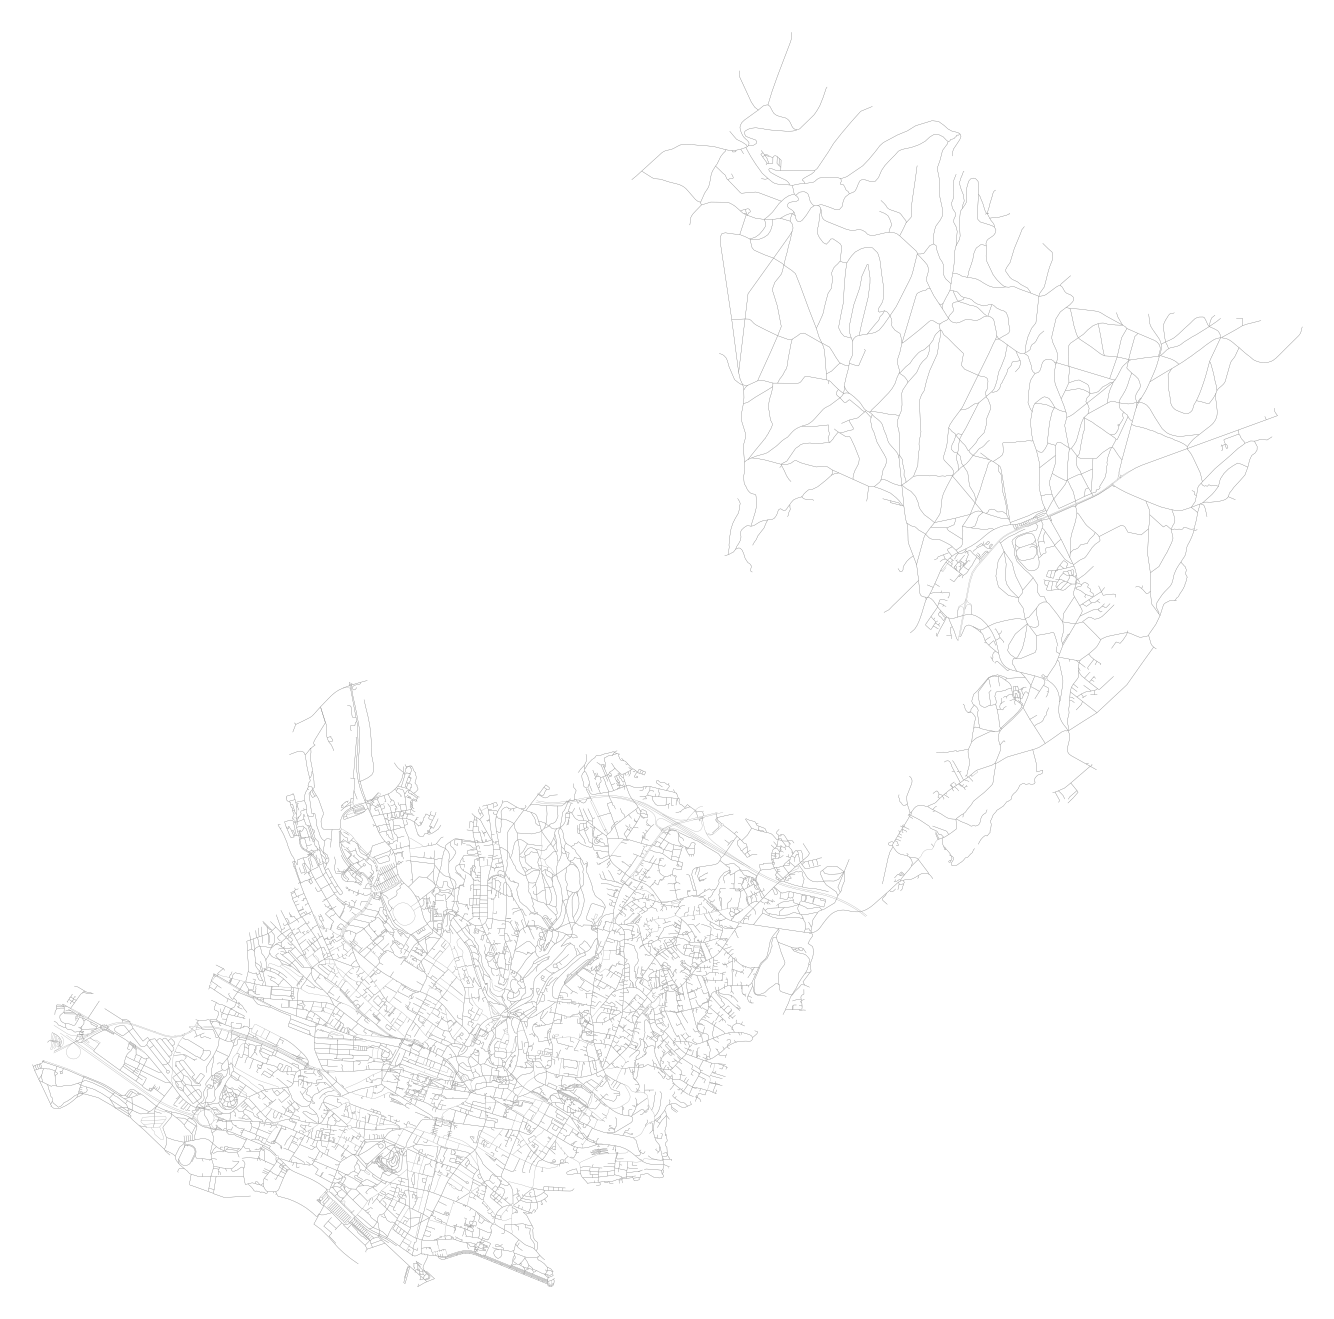

In [6]:
fig, ax = ox.plot_graph(loaded_graph, fig_height=24, node_size=0, edge_linewidth=0.25)